In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [96]:
# Constants for this part of the experiment

mu0 = 4*np.pi*1e-7 # [SI]
I = 1.95  # [A]
r = 3*1e-2  # [m]

## A

In [97]:
db = pd.read_csv('A.csv', header=None, delimiter="\t")
db = db.T.rename(columns={0: 'd [cm]', 1: 'B av.  [mT]', 2: 'B err. [mT]'})
print(db)

    d [cm]  B av.  [mT]  B err. [mT]
0      3.0        0.010     0.000500
1      4.0        0.010     0.000764
2      5.0        0.010     0.000500
3      6.0        0.009     0.000764
4      7.0        0.009     0.000500
5      8.0        0.008     0.000764
6      9.0        0.008     0.000764
7     10.0        0.008     0.000500
8     11.0        0.007     0.000764
9     12.0        0.006     0.000764
10    13.0        0.006     0.000764
11    14.0        0.005     0.000764


In [98]:
def B_wire(r):
    return mu0 * I / (2 * np.pi * r)  # [T]

In [99]:
print(B_wire(r) * 1000)  # [mT]
x = np.linspace(2.5, 15, 500)  # [cm]
y = np.array([B_wire(r) * 1000] * len(x))  # [mT]

0.013


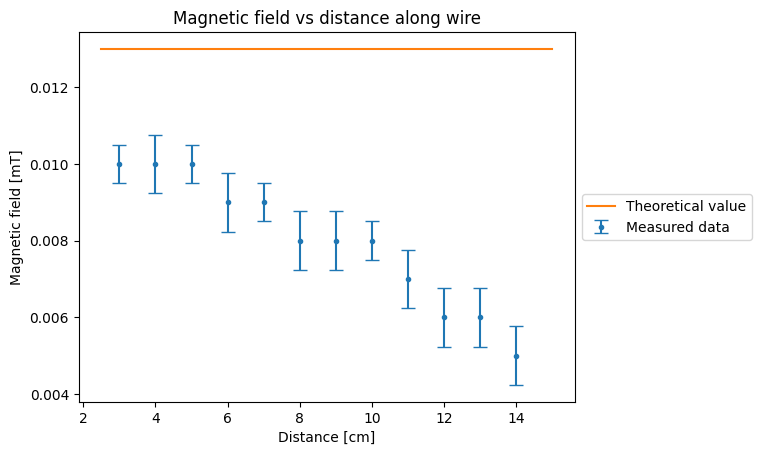

In [100]:
# Error in x-axis is 1 mm, thus not plotted cause completely negligible => mention in discussion

plt.errorbar(db['d [cm]'], db['B av.  [mT]'], yerr=db['B err. [mT]'], fmt='.', capsize=5, label='Measured data')
plt.plot(x, y, label='Theoretical value')

# plt.xlim(0, 15)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Distance [cm]')
plt.ylabel('Magnetic field [mT]')
plt.title('Magnetic field vs distance along wire')
plt.show()

## B

In [101]:
# Constants for this part of this experiment

r = 2*1e-2  # [m]

In [102]:
db = pd.read_csv('B.csv', header=None, delimiter="\t")
db = db.T.rename(columns={0: 'I [A]', 1: 'B av.  [mT]', 2: 'B err. [mT]'})
print(db)

    I [A]  B av.  [mT]  B err. [mT]
0    0.00        0.000     0.000500
1    0.07        0.000     0.000500
2    0.45        0.003     0.000764
3    1.22        0.009     0.000764
4    2.45        0.020     0.000500
5    3.47        0.028     0.000764
6    4.34        0.035     0.000764
7    5.34        0.045     0.000500
8    6.47        0.054     0.000500
9    7.60        0.064     0.000764
10   8.48        0.071     0.000764
11   9.87        0.083     0.000500


In [103]:
def fit_func(x, a, b):
    return a * x + b

In [104]:
popt, pcov = curve_fit(fit_func, db['I [A]'], db['B av.  [mT]'], sigma=db['B err. [mT]'], absolute_sigma=False)
a, b = popt
aerr, berr = np.sqrt(np.diag(pcov))
print(f'a = {a} ± {aerr}')
print(f'b = {b} ± {berr}')

chi_sq = np.sum(((fit_func(db['I [A]'], a, b) - db['B av.  [mT]']) / db['B err. [mT]'])**2)
chi_sq_red = chi_sq / (len(db['I [A]']) - 2)
print(f'chi squared reduced = {chi_sq_red}')

a = 0.008459917278521873 ± 4.072807368950405e-05
b = -0.0006302740530896604 ± 0.0002170032273867509
chi squared reduced = 0.657882576026487


In [105]:
x = np.linspace(0, 13, 500)  # [A]
y = fit_func(x, a, b)  # [mT]

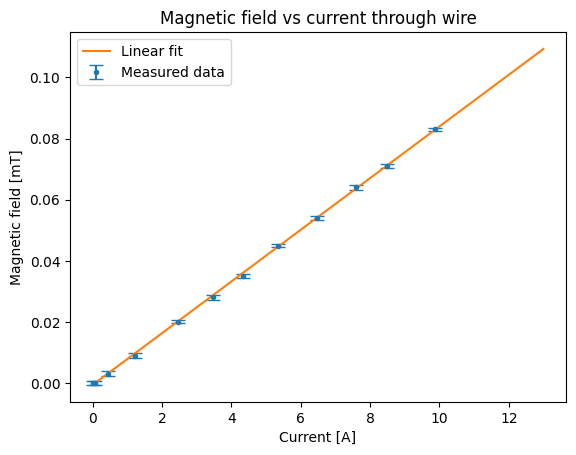

In [106]:
# Error in x-axis is 0.01 A, thus not plotted cause completely negligible => mention in discussion

plt.errorbar(db['I [A]'], db['B av.  [mT]'], yerr=db['B err. [mT]'], fmt='.', capsize=5, label='Measured data')
plt.plot(x, y, label='Linear fit')

plt.legend()
plt.xlabel('Current [A]')
plt.ylabel('Magnetic field [mT]')
plt.title('Magnetic field vs current through wire')
plt.show()

#### Quick maths
$B$ vs $I$ plot $\Rightarrow$ 
slope = $a$ = $\frac{\mu_0}{2 \pi r}$, zero interecpt = 0 $\Rightarrow$
$\mu_0 = 2 \pi r a$, $\Delta \mu_0 = 2 \pi r \Delta a$

In [107]:
mu0_calc = 2 * np.pi * r * a / 1000  # [T m / A]
mu0_calc_err = 2 * np.pi * r * aerr / 1000  # [T m / A]

print(f'mu0 = {mu0_calc} ± {mu0_calc_err} [T m / A]')

mu0 = 1.063104558887267e-06 ± 5.118040683912387e-09 [T m / A]


## C

In [108]:
# Constants for this part of this experiment

I = 9.75  # [A]

In [109]:
db = pd.read_csv('C.csv', header=None, delimiter="\t")
db = db.T.rename(columns={0: 'r [cm]', 1: 'B av.  [mT]', 2: 'B err. [mT]'})
print(db)

    r [cm]  B av.  [mT]  B err. [mT]
0      0.3     0.184667     0.001258
1      1.3     0.093000     0.001118
2      2.3     0.059000     0.000500
3      3.3     0.042333     0.000764
4      5.3     0.025667     0.000764
5      7.3     0.017000     0.000500
6      9.3     0.011667     0.000764
7     11.3     0.008000     0.000500
8     13.3     0.005333     0.000764
9     15.3     0.003333     0.000764
10    17.3     0.002000     0.000500
11    19.3     0.000667     0.000764


In [110]:
popt, pcov = curve_fit(fit_func, (1/db['r [cm]'])[2:], db['B av.  [mT]'][2:], sigma=db['B err. [mT]'][2:], absolute_sigma=False)
a, b = popt
aerr, berr = np.sqrt(np.diag(pcov))
print(f'a = {a} ± {aerr}')
print(f'b = {b} ± {berr}')

chi_sq = np.sum(((fit_func((1/db["r [cm]"])[2:], a, b) - db['B av.  [mT]'][2:]) / db['B err. [mT]'][2:])**2)
chi_sq_red = chi_sq / (len(db['r [cm]'][2:]) - 2)
print(f'chi squared reduced = {chi_sq_red}')  # Not great, huh?

a = 0.1512966144716681 ± 0.003795601798306441
b = -0.005451885843542663 ± 0.0007889831868666407
chi squared reduced = 6.559291488825013


In [111]:
x = np.linspace(0, 0.6, 500)  # [1/cm]
y = fit_func(x, a, b)  # [mT]

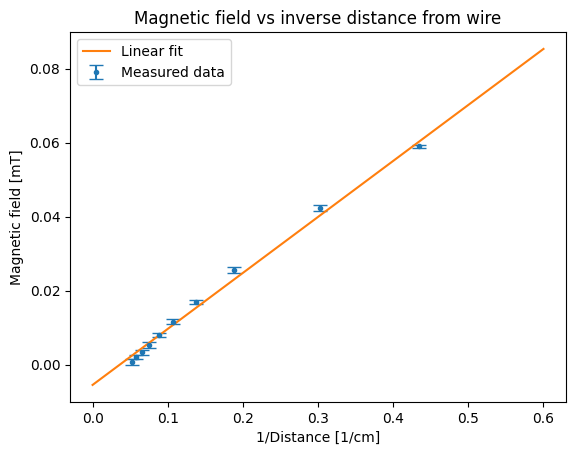

In [112]:
# Note, the two most-right points (the closest ones) seems to be outliers, so we will exclude them from the graph + fit
# Error in x-axis is 1 mm, thus not plotted cause completely negligible => mention in discussion

plt.errorbar((1/db['r [cm]'])[2:], db['B av.  [mT]'][2:], yerr=db['B err. [mT]'][2:], fmt='.', capsize=5, label='Measured data')
plt.plot(x, y, label='Linear fit')

plt.legend()
plt.xlabel('1/Distance [1/cm]')
plt.ylabel('Magnetic field [mT]')
plt.title('Magnetic field vs inverse distance from wire')
plt.show()

#### Quick maths
$B$ vs $1/r$ $\Rightarrow$ slope = $a$ = $\frac{\mu_0 I}{2 \pi}$ $\Rightarrow$
$\mu_0 = \frac{2 \pi a}{I}$, $\Delta \mu_0 = \frac{2 \pi \Delta a}{I}$ 

In [113]:
mu0_calc2 = 2 * np.pi * a / 100000 / I  # [T m / A]
mu0_calc_err2 = 2 * np.pi * aerr / 100000 / I  # [T m / A]

print(f'mu0 = {mu0_calc2} ± {mu0_calc_err2} [T m / A]')

mu0 = 9.749996564865635e-07 ± 2.4459968667716355e-08 [T m / A]


## D

In [114]:
db = pd.read_csv('D.csv', header=None, delimiter="\t")
db = db.T.rename(columns={0: 'r [cm]', 1: 'B av.  [mT]', 2: 'B err. [mT]'})
print(db)

   r [cm]  B av.  [mT]  B err. [mT]
0     0.0    -2.345333     0.058186
1     2.0    -2.332000     0.047035
2     4.0    -2.292333     0.044097
3     6.0    -2.275667     0.041408
4     8.0    -2.302667     0.039428
5    10.0    -2.262667     0.037210
6    12.0    -2.242667     0.015956
7    14.0    -1.951333     0.029540


In [115]:
# Constants for this part of this experiment

In [116]:
def fit_func(x, a):
    return a

In [117]:
sigma = np.sqrt((db['B err. [mT]'][:-1])**2 + (2.29*1)**2)  # propage x-axis error
popt, pcov = curve_fit(fit_func, db['r [cm]'][:-1], db['B av.  [mT]'][:-1], sigma=sigma, absolute_sigma=False)
a = popt
aerr = np.sqrt(np.diag(pcov))
print(f'a = {a} ± {aerr}')

a = [-2.2933282] ± [0.0138931]


In [118]:
x = np.linspace(-1, 13.5, 500)
y = np.array([a] * len(x))

In [119]:
# Find data points which are within 3% of the average value (a)
abs_err = abs((db['B av.  [mT]'] - a) / a)
print(f"{abs_err*100} %")

# Find first index smaller than 3%
homo_begin_idx = abs_err[abs_err < 0.03].index[0]

# Find last index smaller than 3%
homo_end_idx = abs_err[abs_err < 0.03].index[-1]

0     2.267671
1     1.686274
2     0.043381
3     0.770127
4     0.407201
5     1.336988
6     2.209083
7    14.912600
Name: B av.  [mT], dtype: float64 %


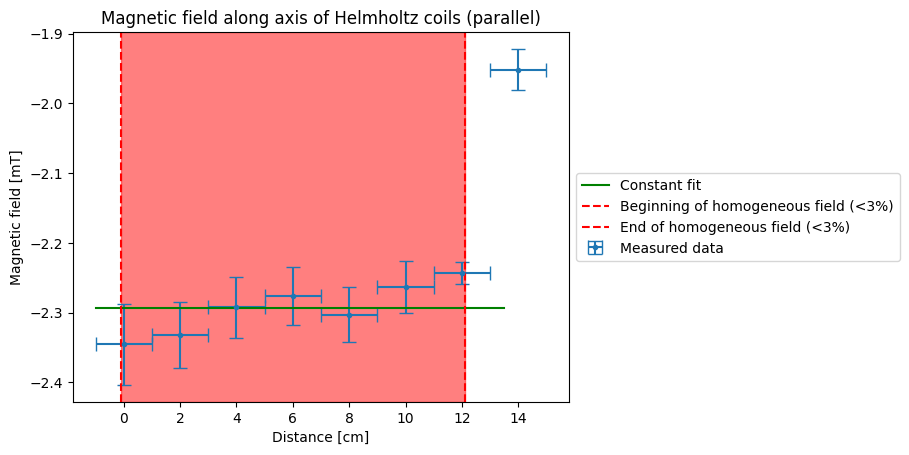

In [120]:
# Right-most point is too far away from the coils, so we will exclude it from the fit

plt.errorbar(db['r [cm]'], db['B av.  [mT]'], yerr=db['B err. [mT]'], xerr=1, fmt='.', capsize=5, label='Measured data')
plt.plot(x, y, label='Constant fit', c="green")

# Vertical line at beginning of homogeneous field
plt.axvline(x=db['r [cm]'][homo_begin_idx]-0.1, color='r', linestyle='--', label='Beginning of homogeneous field (<3%)')
# Vertical line at end of homogeneous field
plt.axvline(x=db['r [cm]'][homo_end_idx]+0.1, color='r', linestyle='--', label='End of homogeneous field (<3%)')
# Highlight the region
plt.axvspan(db['r [cm]'][homo_begin_idx]-0.1, db['r [cm]'][homo_end_idx]+0.1, color='red', alpha=0.5)

# Make the legend be outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Distance [cm]')
plt.ylabel('Magnetic field [mT]')
plt.title('Magnetic field along axis of Helmholtz coils (parallel)')
plt.show()


## E

In [121]:
db = pd.read_csv('E.csv', header=None, delimiter="\t")
db = db.T.rename(columns={0: 'r [cm]', 1: 'B av.  [mT]', 2: 'B err. [mT]'})
print(db)

   r [cm]  B av.  [mT]  B err. [mT]
0     0.0     1.203000     0.032913
1     2.0     0.829667     0.027066
2     4.0     0.356000     0.064135
3     6.0    -0.222667     0.012868
4     8.0    -0.761667     0.017905
5    10.0    -1.138667     0.014580
6    12.0    -1.334000     0.007953
7    14.0    -1.274333     0.018509


In [122]:
# Constants for this part of this experiment

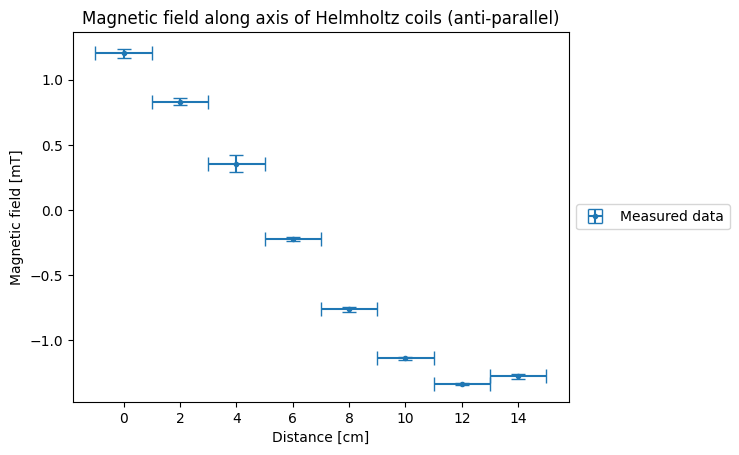

In [123]:
# The field is not homogenues at all - as it should (not) be
plt.errorbar(db['r [cm]'], db['B av.  [mT]'], yerr=db['B err. [mT]'], xerr=1, fmt='.', capsize=5, label='Measured data')

# Make the legend be outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel('Distance [cm]')
plt.ylabel('Magnetic field [mT]')
plt.title('Magnetic field along axis of Helmholtz coils (anti-parallel)')
plt.show()


## F

In [124]:
# Here F, is the force measured by the newton meter
db = pd.read_csv('F.csv', header=None, delimiter="\t")
db = db.T.rename(columns={0: 'I [A]', 1: 'F(parallel) av.  [N]', 2: 'F(parallel) err.  [N]', 3: 'F(anti-parallel) av.  [N]', 4: 'F(anti-parallel) err.  [N]'})
print(db)

   I [A]  F(parallel) av.  [N]  F(parallel) err.  [N]  \
0    0.0                 0.425                 0.0025   
1    0.8                 0.425                 0.0025   
2    1.6                 0.425                 0.0025   

   F(anti-parallel) av.  [N]  F(anti-parallel) err.  [N]  
0                      0.425                      0.0025  
1                      0.350                      0.0025  
2                      0.300                      0.0025  


In [125]:
# Calculated forces are negative because they act against gravity

Fmagnet_par = db["F(parallel) av.  [N]"][2] -  db["F(parallel) av.  [N]"][0]  # at I = 1.6 A
Fmagnet_par_err = db["F(parallel) err.  [N]"][2]
print(f"Fmagnet_par = {Fmagnet_par} ± {Fmagnet_par_err}")

Fmagnet_anti_par = db["F(anti-parallel) av.  [N]"][2] - db["F(anti-parallel) av.  [N]"][0]
Fmagnet_anti_par_err = db["F(anti-parallel) err.  [N]"][2]
print(f"Fmagnet_anti_par = {Fmagnet_anti_par} ± {Fmagnet_anti_par_err}")

Fmagnet_par = 0.0 ± 0.0025
Fmagnet_anti_par = -0.125 ± 0.0025
